In [1]:
#importovanje neophodnih biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#scikit learn preprocesiranje
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
#scikit learn selekcija feature-a
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
#scikit learn izbor modela
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
#sklearn metrike 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix, r2_score
#sklearn modeli
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, LassoCV, ElasticNetCV
from sklearn.kernel_ridge import KernelRidge
#sklearn model selection
from sklearn.model_selection import GridSearchCV
#sklearn za crossvalidation
from sklearn.model_selection import cross_val_score, cross_validate
#auto-sklearn
#import autosklearn.classification
#import autosklearn.regression
#scikit learn neuronske mreze
from sklearn.neural_network import MLPClassifier
#sklearn genetic-opt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn_genetic import GAFeatureSelectionCV
#feature reduction sa PCA
from sklearn.decomposition import PCA
#za handlovanje nebalansiranih datasetova
from imblearn.over_sampling import SMOTE
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
#ucitavanje podataka
file_name = "./datasets/addiction_nova.csv"
data = pd.read_csv(file_name, na_values = ' ')
data.head(10)

,ID,Pol,Godine,SkolaPoTipu,SkolaPoRegionu,Uspeh,EkonomskiPolozaj,ImaKomp,ZadovoljanPristupom,KolikoDugo,...,Internet16,Internet17,Internet18,NKP,PI,SPO,PUI,PUIcutoff,CutOff3940,CutOff4950
0,1,0.0,17.0,1,1,3.0,3.0,0.0,1.0,9.0,...,5.0,5.0,NaN,NaN,16.0,11.0,NaN,NaN,NaN,NaN
1,2,0.0,17.0,1,1,4.0,4.0,0.0,1.0,5.0,...,1.0,2.0,1.0,13.0,7.0,5.0,25.0,0.0,0.0,0.0
2,3,0.0,17.0,1,1,4.0,3.0,0.0,1.0,9.0,...,3.0,1.0,1.0,13.0,9.0,6.0,28.0,0.0,0.0,0.0
3,4,0.0,17.0,1,1,4.0,3.0,0.0,1.0,7.0,...,4.0,1.0,1.0,12.0,14.0,5.0,31.0,0.0,0.0,0.0
4,5,0.0,17.0,1,1,4.0,1.0,1.0,0.0,2.0,...,2.0,1.0,2.0,12.0,9.0,7.0,28.0,0.0,0.0,0.0
5,6,0.0,17.0,1,1,4.0,3.0,0.0,1.0,6.0,...,4.0,1.0,2.0,17.0,10.0,5.0,32.0,0.0,0.0,0.0
6,7,0.0,16.0,1,1,4.0,5.0,0.0,1.0,5.0,...,1.0,2.0,2.0,12.0,7.0,5.0,24.0,0.0,0.0,0.0
7,8,0.0,16.0,1,1,3.0,5.0,0.0,1.0,8.0,...,2.0,1.0,1.0,13.0,12.0,6.0,31.0,0.0,0.0,0.0
8,9,1.0,17.0,1,1,5.0,2.0,0.0,1.0,5.0,...,5.0,2.0,4.0,32.0,20.0,9.0,61.0,1.0,1.0,1.0
9,10,0.0,16.0,1,1,4.0,1.0,0.0,0.0,6.0,...,4.0,1.0,1.0,9.0,10.0,4.0,23.0,0.0,0.0,0.0


In [3]:
#provera da li ima duplikata
print('Broj pronadjenih duplikata: ' + str(data.duplicated().sum()))

Broj pronadjenih duplikata: 0


In [4]:
#sredjivanje kolona
#kolone ID, TEMPS1 do TEMPS36, NKP, PI, SPO, CutOff4950, EnergetskoP2 i Temper_bin ne ulaze u analizu
temp_cols=[]
for col in data.columns:
    if col.startswith('TEMPS'):
        temp_cols.append(col)
out_cols = ['ID','NKP','PI','SPO', 'CutOff4950', 'EnergetskoP2', 'Temper_bin','SkolaPoRegionu','SkolaPoTipu','Komunikacija1','Komunikacija2','Komunikacija3','Komunikacija4','ImaKomp','ZadovoljanPristupom','BrojaMailovaPrim','BrojaMailovaPosl','ZaStaMail','ImaNemaFB','PusacKolikoGodina','PusacKolikoCigareta']
for col in out_cols:
    temp_cols.append(col)
new_data = data.drop(temp_cols, axis=1)
#preimenovanje kolone
new_data.rename(columns = {'CutOff3940':'Cutoff_Class'}, inplace=True)

In [5]:
#eliminacija Internet kolona (Internet1 -> Internet18)
internet_cols=[]
for col in new_data.columns:
    if col.startswith('Internet'):
        internet_cols.append(col)
new_data = new_data.drop(internet_cols, axis=1)
print('Novi broj kolona nakon eliminacije: {}'.format(len(new_data.columns)))

Novi broj kolona nakon eliminacije: 61


In [6]:
#provera koliko ima NaN vrednosti
print(new_data.isna().sum().sort_values(ascending=False))
#za Cutoff_Class kolonu postoji 104 NaN vrednosti, to je otprilike 5% celokupnog dataset-a
#brisemo redove koji imaju NaN vrednost u Cutoff_Class koloni
new_data = new_data.dropna(subset=['Cutoff_Class', 'PUI'])

Cutoff_Class     104
PUIcutoff        104
PUI              104
BrojaSatiFB       95
KolikoDugo        91
                ... 
Iritabilni         0
Anksiozni          0
FBcitaPostove      0
FBigraIgrice       0
FBgrupe            0
Length: 61, dtype: int64


In [7]:
#preimenovanje varijabli
mapiranje = {
    'Pol':'Gender',
    'Godine':'Age',
    'Uspeh':'Achievement',
    'EkonomskiPolozaj':'Economic status',
    'KolikoDugo':'Internet Use (in years)',
    'KolikoNedeljno':'Internet Use (hours per week)',
    'KolikNajduze':'Internet Use (hours per day)',
    'Predhodnih6meseci':'Internet Use (in holiday)',
    'DaMozeDaLiBi':'Attitude about time on the Internet',
    'Sadrzaj1':'Politics',
    'Sadrzaj2':'Business',
    'Sadrzaj3':'Sports',
    'Sadrzaj4':'Computers and technology',
    'Sadrzaj5':'Arts and culture',
    'Sadrzaj6':'Education',
    'Sadrzaj7':'Pop culture',
    'Sadrzaj8':'Pornography',
    'Sadrzaj9':'Music',
    'Sadrzaj10':'Travel/tourism',
    'Sadrzaj11':'Health and medicine',
    'Sadrzaj12':'Science',
    'Sadrzaj13':'Religion',
    'Aktivnost1': 'Communication by e-mail',
    'Aktivnost2':'Social networks',
    'Aktivnost3':'Communication on the forum',
    'Aktivnost4':'Communication on the blog',
    'Aktivnost5':'Targeted Internet search',
    'Aktivnost6':'Surfing',
    'Aktivnost7':'Expert Advice',
    'Aktivnost8':'Search for favorite websites',
    'Aktivnost9':'Reading the news',
    'Aktivnost10':'Online games',
    'Aktivnost11':'Reading and downloading books and texts',
    'Aktivnost12':'Downloading music and movies',
    'Aktivnost13': 'Internet for school',
    'Aktivnost14':'Online courses',
    'DaLiSvakodnevnoFb':'Everyday FB use',
    'BrojaSatiFB':'Average time spent on FB',
    'FBigraIgrice':'FB use –gaming',
    'FBcetuje':'FB use – chatting',
    'FBgrupe':'FB use – visiting groups',
    'FBcitaPostove':'FB use - reading posts',
    'FBpiseStatuse':'FB use - publishing statuses',
    'FBdeliMuzikuFotografijeIsl':'FB use - sharing music, photos etc.',
    'FizAkt1':'Sports – days in a  week',
    'FizAkt2':'Sports – intensity',
    'FizAkt3':'Sports – in minutes',
    'EnergetskoP1':'Energy drinks',
    'EnergetskoP2': 'Energy drinks (ml)',
    'Grickalice':'Fast Food',
    'Pusac':'Smoker',
    'Kafa_bin':'Coffee',
    'Alkohol_bin':'Alcohol',
    'Depresivan':'Drepressive temperament',
    'Ciklotimicni':'Cyclothymic temperament',
    'Hipertimicni':'Hyperthymic temperament',
    'Iritabilni':'Irritable temperament',
    'Anksiozni':'Anxiety temperament',
    'DaLiSeDrogira':'Drug use'
}
new_data = new_data.rename(columns=mapiranje)
print(new_data.columns)

Index(['Gender', 'Age', 'Achievement', 'Economic status',
       'Internet Use (in years)', 'Internet Use (hours per week)',
       'Internet Use (hours per day)', 'Internet Use (in holiday)',
       'Attitude about time on the Internet', 'Politics', 'Business', 'Sports',
       'Computers and technology', 'Arts and culture', 'Education',
       'Pop culture', 'Pornography', 'Music', 'Travel/tourism',
       'Health and medicine', 'Science', 'Religion', 'Communication by e-mail',
       'Social networks', 'Communication on the forum',
       'Communication on the blog', 'Targeted Internet search', 'Surfing',
       'Expert Advice', 'Search for favorite websites', 'Reading the news',
       'Online games', 'Reading and downloading books and texts',
       'Downloading music and movies', 'Internet for school', 'Online courses',
       'Everyday FB use', 'Average time spent on FB', 'FB use - reading posts',
       'FB use - publishing statuses', 'FB use - sharing music, photos etc.',
    

In [8]:
#kolone sa samo binarnim vrednostima
zero_one = ['Gender','Internet Use (hours per week)',
                 'Attitude about time on the Internet','Everyday FB use',
                 'FB use - reading posts','FB use - publishing statuses','FB use - sharing music, photos etc.', 
                 'FB use –gaming','FB use – chatting','FB use – visiting groups','Energy drinks','Fast Food','Smoker',
                 'Coffee','Alcohol','Drug use','PUI']

zero_one_with_NaN = list()
for col in new_data[zero_one]:
    if(new_data[col].isna().sum()>0):
        zero_one_with_NaN.append(col)
#provera koje od ovih kolona imaju NaN vrednosti
print(new_data[zero_one].isna().sum().sort_values(ascending=False))

Fast Food                              39
Energy drinks                          33
Internet Use (hours per week)          30
Attitude about time on the Internet    24
Everyday FB use                        24
Coffee                                 24
Alcohol                                16
Smoker                                 16
Drug use                               14
Gender                                  1
FB use – chatting                       0
FB use – visiting groups                0
FB use –gaming                          0
FB use - sharing music, photos etc.     0
FB use - publishing statuses            0
FB use - reading posts                  0
PUI                                     0
dtype: int64


In [9]:
#zamena vrednosti za kolone sa binarnim vrednostima koje imaju NaN vrednosti
for col in new_data[zero_one_with_NaN].columns:
    zero_row_num = new_data[col].value_counts()[0.0]
    one_row_num = new_data[col].value_counts()[1.0]
    if (zero_row_num > one_row_num):
        swap_value = 0
    else:
        swap_value = 1
    new_data[col] = new_data[col].fillna(swap_value)
print(new_data[zero_one_with_NaN].isna().sum().sort_values(ascending=False))

Gender                                 0
Internet Use (hours per week)          0
Attitude about time on the Internet    0
Everyday FB use                        0
Energy drinks                          0
Fast Food                              0
Smoker                                 0
Coffee                                 0
Alcohol                                0
Drug use                               0
dtype: int64


In [10]:
#kolone gde se iste vrednosti pojavljuju cesto
repeat_value_cols = ['Age', 'Achievement','Economic status','Internet Use (hours per day)',
                     'Internet Use (in holiday)','Sports – days in a  week','Sports – intensity']
sadrzaj_cols = ['Politics','Business','Sports','Computers and technology','Arts and culture','Education','Pop culture','Pornography',
               'Music','Travel/tourism','Health and medicine','Science','Religion']
aktivnost_cols = ['Communication by e-mail','Social networks','Communication on the forum','Communication on the blog',
                 'Targeted Internet search','Surfing','Expert Advice','Search for favorite websites','Reading the news',
                 'Online games','Reading and downloading books and texts','Downloading music and movies','Internet for school','Online courses']
repeat_value_cols = repeat_value_cols + sadrzaj_cols + aktivnost_cols
print(repeat_value_cols)

['Age', 'Achievement', 'Economic status', 'Internet Use (hours per day)', 'Internet Use (in holiday)', 'Sports – days in a  week', 'Sports – intensity', 'Politics', 'Business', 'Sports', 'Computers and technology', 'Arts and culture', 'Education', 'Pop culture', 'Pornography', 'Music', 'Travel/tourism', 'Health and medicine', 'Science', 'Religion', 'Communication by e-mail', 'Social networks', 'Communication on the forum', 'Communication on the blog', 'Targeted Internet search', 'Surfing', 'Expert Advice', 'Search for favorite websites', 'Reading the news', 'Online games', 'Reading and downloading books and texts', 'Downloading music and movies', 'Internet for school', 'Online courses']


In [11]:
#zamena nedostajucih vrednosti kod kolona gde se iste vrednosti pojavljuju cesto
repeat_cols_with_NaN = list()
for col in new_data[repeat_value_cols]:
    if(new_data[col].isna().sum()>0):
        repeat_cols_with_NaN.append(col)
        
for col in new_data[repeat_cols_with_NaN]:
    mode = new_data[col].mode()[0]
    new_data[col] = new_data[col].fillna(mode)
print(new_data[repeat_cols_with_NaN].isna().sum().sort_values(ascending=False))

Age                                        0
Surfing                                    0
Religion                                   0
Communication by e-mail                    0
Social networks                            0
Communication on the forum                 0
Communication on the blog                  0
Targeted Internet search                   0
Expert Advice                              0
Achievement                                0
Search for favorite websites               0
Reading the news                           0
Online games                               0
Reading and downloading books and texts    0
Internet for school                        0
Science                                    0
Health and medicine                        0
Travel/tourism                             0
Music                                      0
Pornography                                0
Pop culture                                0
Education                                  0
Arts and c

In [12]:
#zamena nedostajucih vrednosti kod kolona sa nebinarnim vrednostima sa srednjom vrednoscu
filter_cols = zero_one + repeat_value_cols
non_binary_cols = new_data.columns.difference(filter_cols).values
non_binary_cols_with_NaN = list()
for col in new_data[non_binary_cols]:
    if(new_data[col].isna().sum()>0):
        non_binary_cols_with_NaN.append(col)
for col in new_data[non_binary_cols_with_NaN]:
    mean = new_data[col].mean()
    new_data[col] = new_data[col].fillna(mean)

In [13]:
#provera da li nakon preprocesiranja ima NaN vrednosti
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ): print(new_data.isna().sum().sort_values(ascending=False))

Gender                                     0
Online games                               0
Internet for school                        0
Online courses                             0
Everyday FB use                            0
Average time spent on FB                   0
FB use - reading posts                     0
FB use - publishing statuses               0
FB use - sharing music, photos etc.        0
FB use –gaming                             0
FB use – chatting                          0
FB use – visiting groups                   0
Sports – days in a  week                   0
Sports – intensity                         0
Sports – in minutes                        0
Energy drinks                              0
Fast Food                                  0
Smoker                                     0
Coffee                                     0
Alcohol                                    0
Drug use                                   0
Drepressive temperament                    0
Cyclothymi

In [14]:
#podesavanje input i output kolone
input_cols = new_data[new_data.columns.difference(['Cutoff_Class','PUIcutoff','PUI'])]
output_col = new_data['Cutoff_Class']

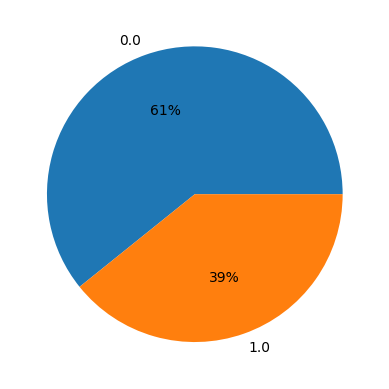

In [15]:
#pie chart za prikaz raspodele po klasama
labels = pd.unique(new_data['Cutoff_Class'])
countByClass = new_data.groupby('Cutoff_Class').size()
#colors = sns.color_palette('pastel')[0:2]
plt.pie(countByClass, labels = labels, autopct='%.0f%%')
plt.show()

In [16]:
#detekcija i eliminacija outlier vrednosti primenom isolation forest-a
def delete_outliers(data):
    isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.05, max_samples = 'auto')
    outlier_prediction = isolation_forest.fit_predict(data.values)
    print("Number of normal values detected: {}".format(outlier_prediction[outlier_prediction  == 1].sum()))
    print("Number of outliers detected: {}".format(abs(outlier_prediction[outlier_prediction == -1].sum())))
    data_no_outliers = data.copy()
    data_no_outliers['Is_Outlier'] = outlier_prediction
    data_no_outliers.drop(data_no_outliers[(data_no_outliers['Is_Outlier'] == -1)].index, axis = 0, inplace=True)
    data_no_outliers = data_no_outliers[data_no_outliers.columns.difference(['Is_Outlier'])]
    print('Number of values after eliminating outliers: ' + str(len(data_no_outliers)))
    return data_no_outliers
new_data_no_outliers = delete_outliers(new_data)

Number of normal values detected: 1908
Number of outliers detected: 101
Number of values after eliminating outliers: 1908


In [17]:
#normalizacija podataka -> normalizujemo sve kolone osim onih koje imaju samo binarne vrednosti 
cols_to_normalize = input_cols.columns.difference(zero_one)
min_max = MinMaxScaler()
new_data_norm = new_data_no_outliers.copy()
new_data_norm[cols_to_normalize] = min_max.fit_transform(new_data_norm[cols_to_normalize])

In [18]:
#standardizacija podataka, vazi isto sto i za normalizaciju
cols_to_standardize = input_cols.columns.difference(zero_one)
standard_scaler = StandardScaler()
new_data_standard = new_data_no_outliers.copy()
new_data_standard[cols_to_standardize] = standard_scaler.fit_transform(new_data_standard[cols_to_standardize])

In [19]:
#podela na train i test set
X_cols = new_data[new_data.columns.difference(['Cutoff_Class', 'PUIcutoff', 'PUI' ])]
y_col = new_data['Cutoff_Class']

X_cols_preprocessed = new_data_norm[new_data_norm.columns.difference(['Cutoff_Class', 'PUIcutoff', 'PUI' ])]
y_col_preprocessed = new_data_norm['Cutoff_Class']

#treniranje sa neobradjenim i preprocesiranim skupom
X_train, X_test, y_train, y_test = train_test_split(X_cols, y_col, test_size=0.3)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_cols_preprocessed, y_col_preprocessed, test_size=0.2)

Classification report sa svim feature-ima za PCA: 
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       249
         1.0       0.69      0.57      0.63       133

    accuracy                           0.76       382
   macro avg       0.74      0.72      0.73       382
weighted avg       0.76      0.76      0.76       382

Classification report sa redukovanim feature-ima za PCA: 
              precision    recall  f1-score   support

         0.0       0.62      0.69      0.66       249
         1.0       0.27      0.22      0.24       133

    accuracy                           0.53       382
   macro avg       0.45      0.45      0.45       382
weighted avg       0.50      0.53      0.51       382



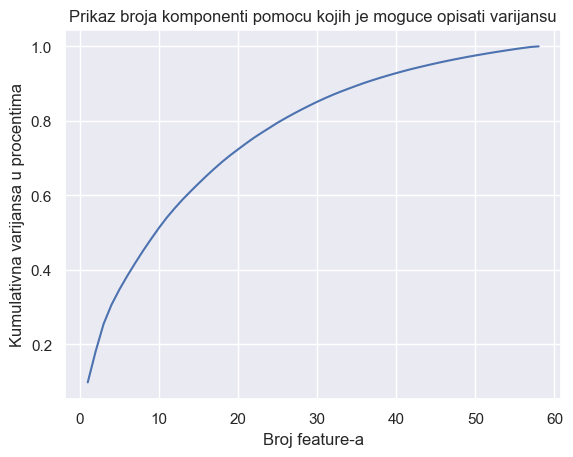

In [32]:
#primena principal component analysis na problem redukcije feature-a
pca = PCA(n_components = None)
X_train_new = pca.fit_transform(X_train_p)
X_test_new = pca.fit_transform(X_test_p)

fig, ax = plt.subplots()
x = np.arange(1,59, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Broj feature-a')
plt.ylabel('Kumulativna varijansa u procentima')
plt.title('Prikaz broja komponenti pomocu kojih je moguce opisati varijansu')
plt.plot(x,y)
clr = RandomForestClassifier()
clr.fit(X_train_p, y_train_p)

y_pred_pca = clr.predict(X_test_p)
accuracy = accuracy_score(y_test_p, y_pred_pca)
print('Classification report sa svim feature-ima za PCA: \n' + (classification_report(y_test_p, y_pred_pca)))

#broj komponenti predstavljen vrednoscu nakon koje se uocava zaravnjenje krive
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train_p)
X_test_pca = pca.fit_transform(X_test_p)
clr = RandomForestClassifier()
clr.fit(X_train_pca, y_train_p)

y_pred_pca = clr.predict(X_test_pca)
print('Classification report sa redukovanim feature-ima za PCA: \n' + (classification_report(y_test_p, y_pred_pca)))


Index(['Attitude about time on the Internet', 'Cutoff_Class',
       'Cyclothymic temperament', 'Internet Use (hours per day)',
       'Internet Use (hours per week)', 'Irritable temperament', 'PUI',
       'PUIcutoff'],
      dtype='object')


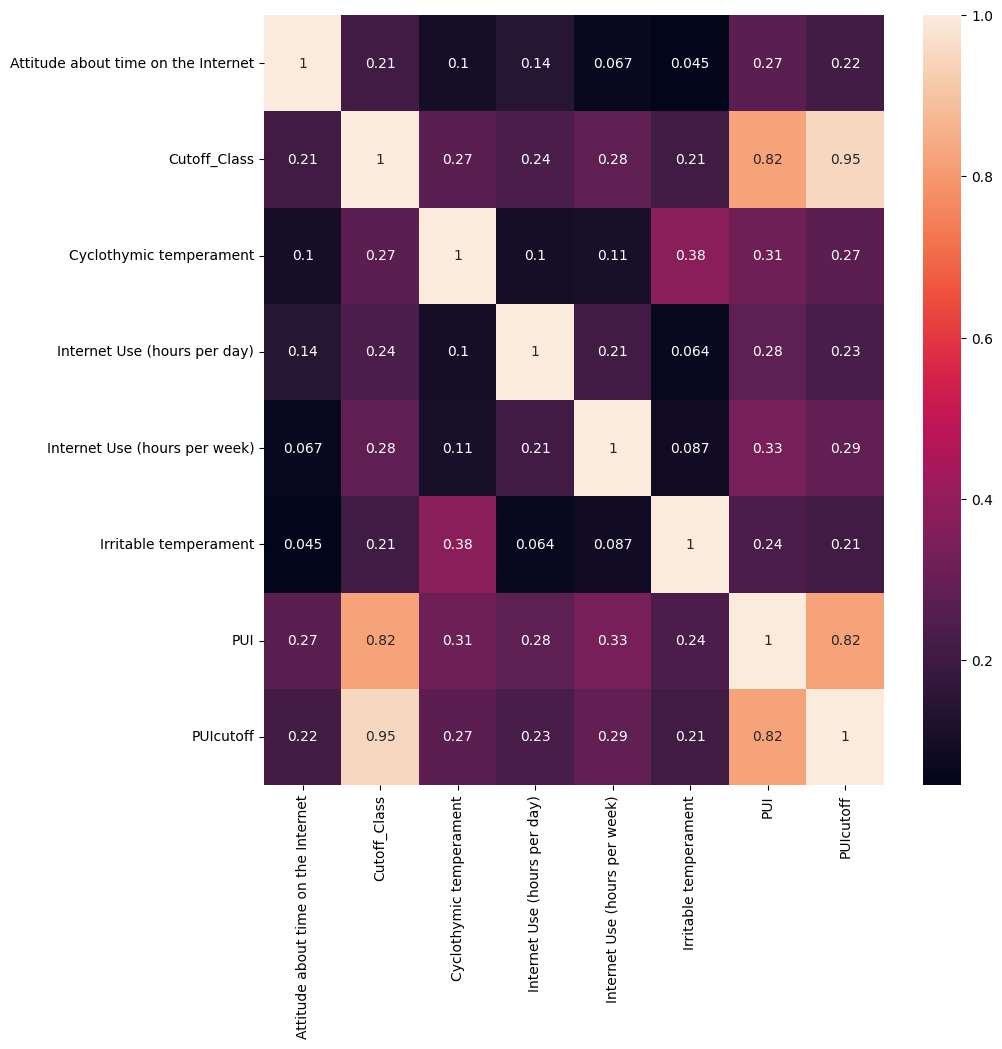

In [20]:
#prikaz heat mape gde se vide koeficijenti korelacije
def correlation_coef(corr_treshold):
    plt.figure(figsize=(10,10))
    correlation = new_data_norm.corr()
    correlation_treshold = correlation['Cutoff_Class']
    good_features = correlation_treshold[abs(correlation_treshold > corr_treshold )]
    print(str(good_features.keys()))
    #print(good_features.sort_values(ascending=False))
    sns.heatmap(new_data_norm[good_features.keys()].corr(), annot=True)
correlation_coef(0.2)

In [31]:
#DEO SA KLASIFIKACIJOM
#modeli bez podesavanja hiperparametara
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
grad_boost_class = GradientBoostingClassifier()

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
Accuracy for model with all features: 0.76
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       249
         1.0       0.71      0.51      0.59       133

    accuracy                           0.76       382
   macro avg       0.74      0.70      0.71       382
weighted avg       0.75      0.76      0.75       382



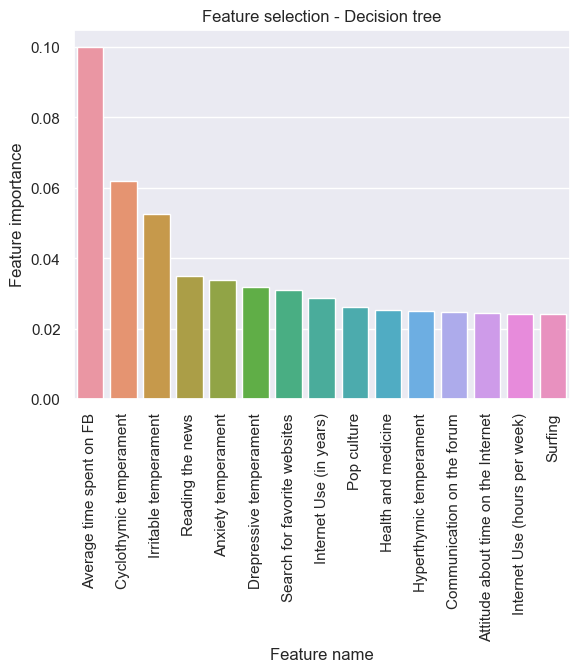

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9)
Accuracy for model with feature selection: 0.76
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       249
         1.0       0.67      0.62      0.65       133

    accuracy                           0.76       382
   macro avg       0.74      0.73      0.73       382
weighted avg       0.76      0.76      0.76       382



In [33]:
#podesavanje hiperparametara za decision tree
parameters = {'max_leaf_nodes': list(range(2,10)), 
              'min_samples_split':[2,3,4],
              'max_depth': [2,3,5,10],
              'criterion': ['gini', 'entropy']}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela bez sa svim feature-ima
best_model= grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {:.2f}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa selekcijom najboljih feature-a
features_dtc = feature_selection_decision_tree(15)
best_model = grid_search_cv.fit(X_train_p[features_dtc], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_dtc])
print('Accuracy for model with feature selection: {:.2f}'.format(best_model.score(X_test_p[features_dtc], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
RandomForestClassifier(max_depth=9, max_features=4, n_estimators=40)
Accuracy for model with all features: 0.78
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       249
         1.0       0.74      0.55      0.63       133

    accuracy                           0.78       382
   macro avg       0.77      0.72      0.74       382
weighted avg       0.77      0.78      0.77       382



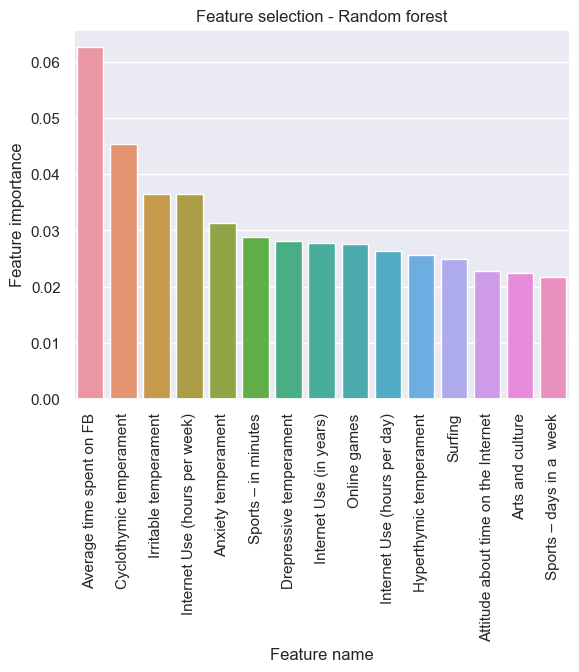

Fitting 10 folds for each of 90 candidates, totalling 900 fits
RandomForestClassifier(max_depth=4, max_features=6, n_estimators=10)
Accuracy for model with feature selection: 0.75
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       249
         1.0       0.68      0.52      0.59       133

    accuracy                           0.75       382
   macro avg       0.73      0.70      0.70       382
weighted avg       0.74      0.75      0.74       382



In [34]:
#podesavanje hiperparametara za random forest
parameters = {'n_estimators':[10,20,40], 
              'criterion': ['gini', 'entropy'],
              'max_features': list(range(3,8)),
              'max_depth': [2,4,9]
               }
grid_search_cv = GridSearchCV(RandomForestClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {:.2f}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa selekcijom feature-a i preprocesiranim podacima
features_rf = feature_selection_random_forest(15)
best_model = grid_search_cv.fit(X_train_p[features_rf], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_rf])
print('Accuracy for model with feature selection: {:.2f}'.format(best_model.score(X_test_p[features_rf], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

In [35]:
#podesavanje hiperparametara za K-Nearest-Neighbors
parameters = {'n_neighbors': list(range (1,21)), 
              'metric': ['euclidean', 'manhattan', 'minkowski'], 
              'weights': ['uniform', 'distance']}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa preprocesiranim podacima i selekcijom feature-a

#treniranje modela sa Elastic-Net feature-ima

features_elastic = feature_selection_elasticnet_cv(20)
best_model = grid_search_cv.fit(X_train_p[features_elastic], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_elastic])
print('Accuracy for model with feature selection: {}'.format(best_model.score(X_test_p[features_elastic], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')
Accuracy for model with all features: 0.7408376963350786
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82       249
         1.0       0.73      0.41      0.52       133

    accuracy                           0.74       382
   macro avg       0.74      0.66      0.67       382
weighted avg       0.74      0.74      0.72       382

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')
Accuracy for model with feature selection: 0.7617801047120419
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       249
         1.0       0.71      0.53      0.61       13

In [36]:
#podesavanje hiperparametara za gradient boosting
parameters = {"n_estimators":[5,50,70],
              "max_depth":[1,3,5,7,9,11],
              "learning_rate":[0.01,0.1,1,10,100]}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa ElasticNet feature-ima i preprocesiranim podacima
features_elastic = feature_selection_elasticnet_cv(20)
best_model = grid_search_cv.fit(X_train_p[features_elastic], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_elastic])
print('Accuracy for model with feature selection: {}'.format(best_model.score(X_test_p[features_elastic], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
GradientBoostingClassifier(n_estimators=50)
Accuracy for model with all features: 0.7801047120418848
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       249
         1.0       0.72      0.60      0.66       133

    accuracy                           0.78       382
   macro avg       0.76      0.74      0.75       382
weighted avg       0.78      0.78      0.77       382

Fitting 10 folds for each of 90 candidates, totalling 900 fits
GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=50)
Accuracy for model with feature selection: 0.7696335078534031
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       249
         1.0       0.67      0.66      0.67       133

    accuracy                         

In [37]:
#podesavanje hiperparametara za Naive Bayes
parameters = {'var_smoothing': np.logspace(0,-9,num=100)}
grid_search_cv = GridSearchCV(GaussianNB(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima i bez preprocesiranja podataka
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa LassoCV feature-ima i preprocesiranim podacima 
features_elastic = feature_selection_lasso_cv(20)
best_model = grid_search_cv.fit(X_train_p[features_elastic], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_elastic])
print('Accuracy for model with feature selection: {}'.format(best_model.score(X_test_p[features_elastic], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.43287612810830584)
Accuracy for model with all features: 0.7486910994764397
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       249
         1.0       0.65      0.62      0.63       133

    accuracy                           0.75       382
   macro avg       0.72      0.72      0.72       382
weighted avg       0.75      0.75      0.75       382

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.3511191734215131)
Accuracy for model with feature selection: 0.7617801047120419
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       249
         1.0       0.68      0.59      0.63       133

    accuracy                           0.76       382
   mac

In [42]:
# k-fold cross-validation za razne modele ML-a
models = [
            ('Decision Tree', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)), 
            ('Gaussian Naive Bayes', GaussianNB(var_smoothing=0.43287612810830584)), 
            ('K-Nearest Neighbors', KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')), 
            ('Random Forest', RandomForestClassifier(max_depth=9, max_features=4, n_estimators=40)),
            ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=50))]
results = []
results_accuracy = []
results_precision = []
results_recall = []
results_f1 = []
names = []
k_fold = StratifiedKFold(n_splits=10)
for name, model in models:
    cv_res = cross_validate(model, X_train_p, y_train_p, cv=k_fold, scoring=['accuracy', 'precision','recall','f1'])
    results.append(cv_res)
    results_accuracy.append(cv_res['test_accuracy'].mean())
    results_precision.append(cv_res['test_precision'].mean())
    results_recall.append(cv_res['test_recall'].mean())
    results_f1.append(cv_res['test_f1'].mean())
    names.append(name)

In [43]:
#tabelarni prikaz rezultata za razlicite modele bez preprocesiranja
diff_models_res = pd.DataFrame({'Model name': names,
                                'Accuracy': results_accuracy,
                                'Precision': results_precision, 
                                'Recall': results_recall,
                                'F1': results_f1})
print(diff_models_res)
#zaokurzivanje rezultata na 2 decimale
diff_models_res_round = diff_models_res.round(3)
print("\n")
print(diff_models_res_round)

                     Model name  Accuracy  Precision    Recall        F1
0                 Decision Tree  0.704472   0.656519  0.520989  0.576395
1          Gaussian Naive Bayes  0.721543   0.668456  0.559944  0.607637
2           K-Nearest Neighbors  0.699841   0.703750  0.389463  0.499650
3                 Random Forest  0.731342   0.728428  0.490650  0.585529
4  Gradient Boosting Classifier  0.730044   0.689973  0.556497  0.614729


                     Model name  Accuracy  Precision  Recall     F1
0                 Decision Tree     0.704      0.657   0.521  0.576
1          Gaussian Naive Bayes     0.722      0.668   0.560  0.608
2           K-Nearest Neighbors     0.700      0.704   0.389  0.500
3                 Random Forest     0.731      0.728   0.491  0.586
4  Gradient Boosting Classifier     0.730      0.690   0.556  0.615


In [44]:
#pomocni frejmovi za kasniji prikaz grafikona 
metrics = ['Accuracy','Precision','Recall','F1']
models = diff_models_res['Model name']
accuracy = diff_models_res['Accuracy']
precision = diff_models_res['Precision']
recall = diff_models_res['Recall']
f1 = diff_models_res['F1']
print(accuracy.round(3))

0    0.704
1    0.722
2    0.700
3    0.731
4    0.730
Name: Accuracy, dtype: float64


In [45]:
def dodajLabele(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i] , y[i], ha = 'center')

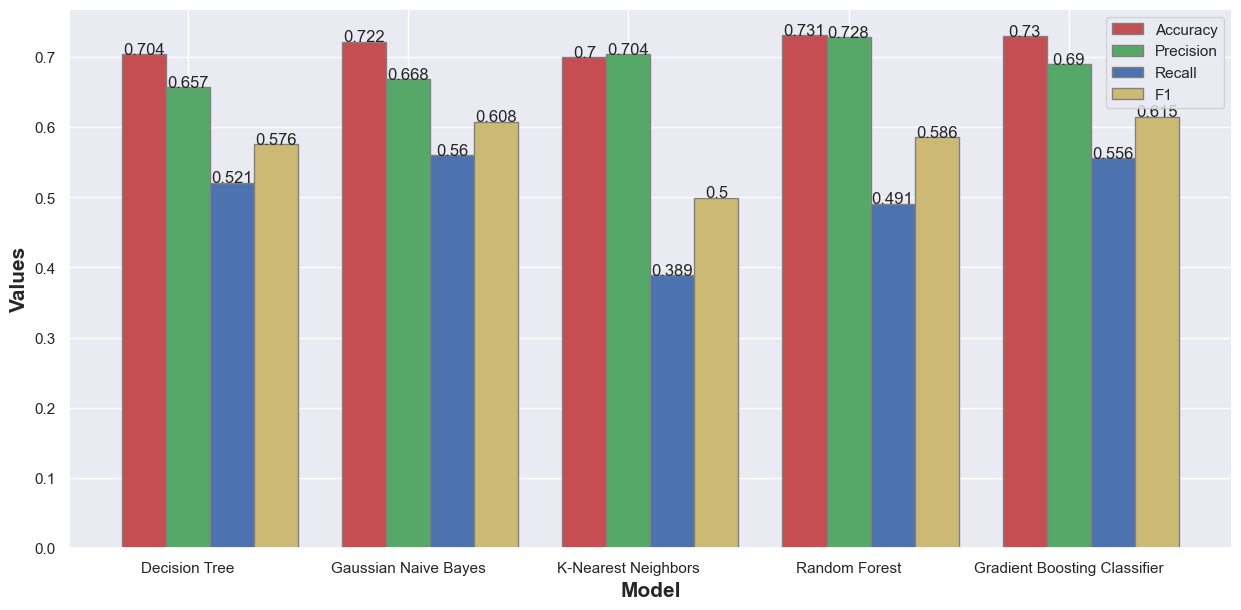

In [46]:
#kreiranje grafickog prikaza 
barWidth = 0.20
fig = plt.subplots(figsize =(15, 7))
metrics = ['Accuracy','Precision','Recall','F1']
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Values', fontweight ='bold', fontsize = 15)

br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x +barWidth for x in br3]

plt.xticks([r + barWidth for r in range(len(models))],
        models)

dodajLabele(br1,accuracy.round(3))
plt.bar(br1, accuracy, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy')

dodajLabele(br2, precision.round(3))
plt.bar(br2, precision, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision')

dodajLabele(br3, recall.round(3))
plt.bar(br3, recall, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall')

dodajLabele(br4, f1.round(3))
plt.bar(br4, f1, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1')

plt.legend()
plt.show()

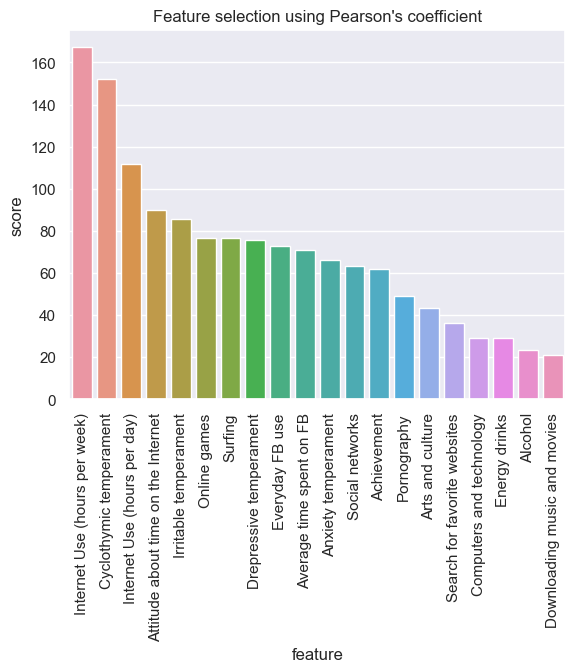

In [21]:
#feature selection sa Pearsonovim koeficijentom, input numericki, output numericki, za klasifikaciju
def feature_selection_pearson(n_features):
    best_features = SelectKBest(score_func = f_regression, k=n_features)
    calc_features = best_features.fit(X_cols_preprocessed,y_col_preprocessed)
    #odabir najboljih feature-a
    usefull_features = pd.DataFrame({'feature' : X_cols_preprocessed.columns.values, 'score' : calc_features.scores_})
    most_usefull_features = usefull_features.sort_values(by=['score'],ascending=False).head(n_features)
    #vizuelizacija dobijenih rezultata
    sns.set()
    plt.title('Feature selection using Pearson\'s coefficient')
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Naziv kolone')

    sns.barplot(x=most_usefull_features['feature'], y=most_usefull_features['score'])
    plt.show()
    feat_to_ret = most_usefull_features['feature']
    return feat_to_ret

results = feature_selection_pearson(20)

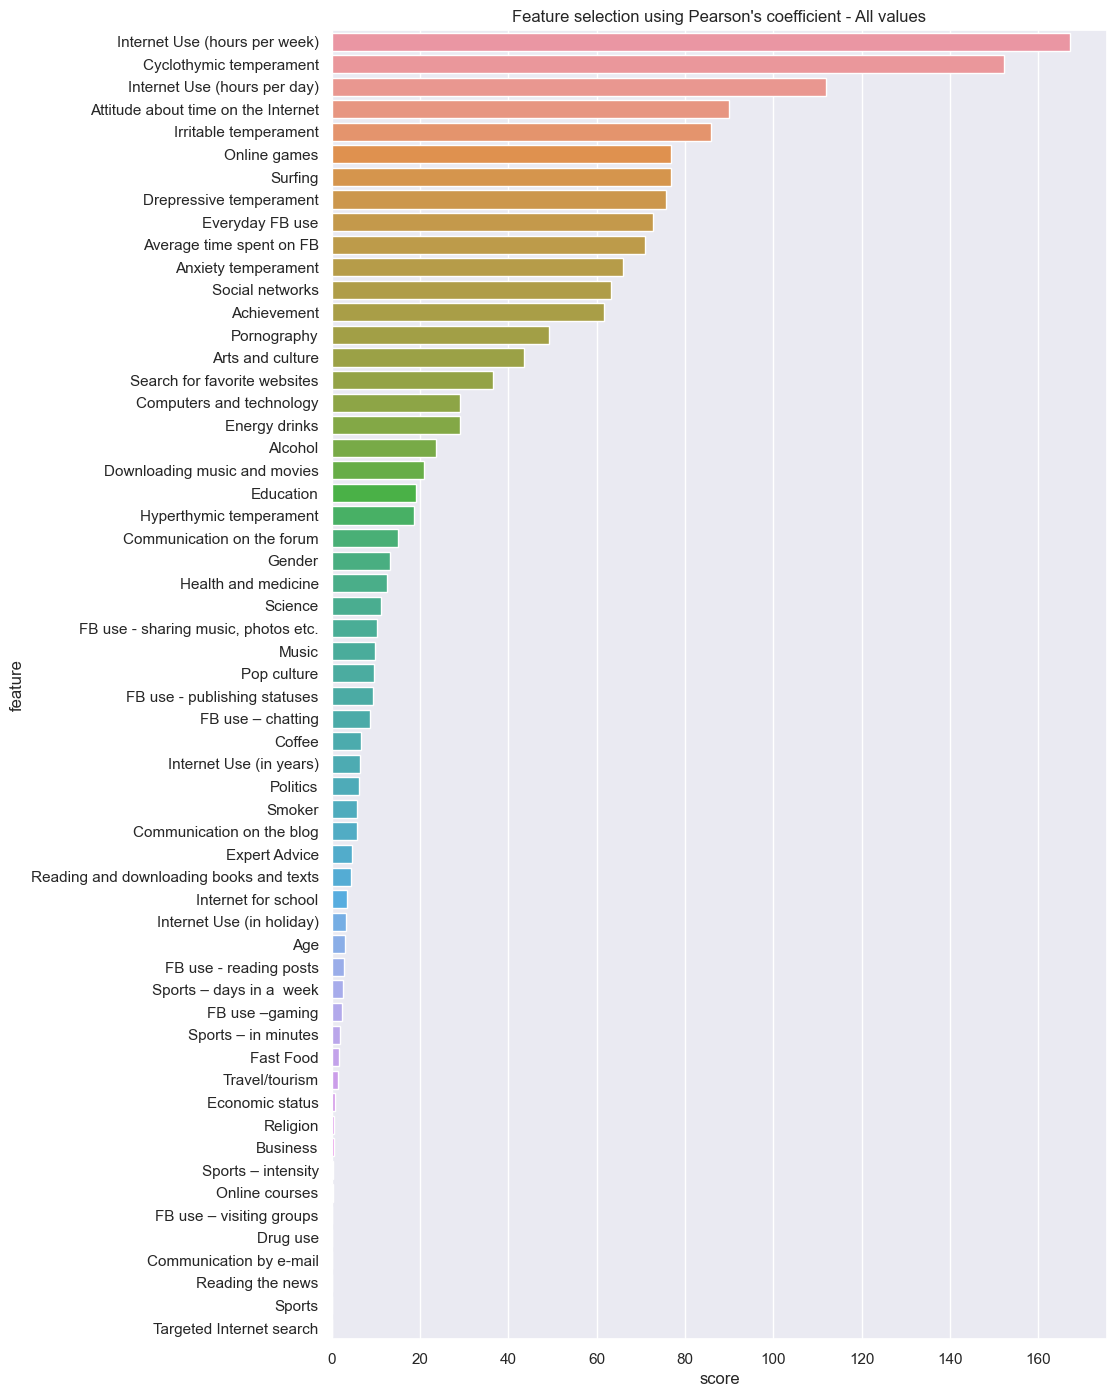

In [22]:
#feature selection sa Pearsonovim koeficijentom, input numericki, output numericki, za klasifikaciju
#varijanta sa prikazom svih atributa, nema negativnih vrednosti

def pearson_results_all():
    best_features = SelectKBest(score_func = f_regression, k=58)
    calc_features = best_features.fit(X_cols_preprocessed,y_col_preprocessed)
    #odabir najboljih feature-a
    usefull_features = pd.DataFrame({'feature' : X_cols_preprocessed.columns.values, 'score' : calc_features.scores_})
    usefull_features = usefull_features.sort_values(by=['score'],ascending=False)
    #vizuelizacija dobijenih rezultata
    plt.figure(figsize=(10,17))
    plt.title('Feature selection using Pearson\'s coefficient - All values')
    plt.xlabel('Feature score')
    plt.ylabel('Naziv kolone')

    sns.barplot(y=usefull_features['feature'], x=usefull_features['score'])
    plt.show()
    feat_to_ret = usefull_features['feature']

results = pearson_results_all()

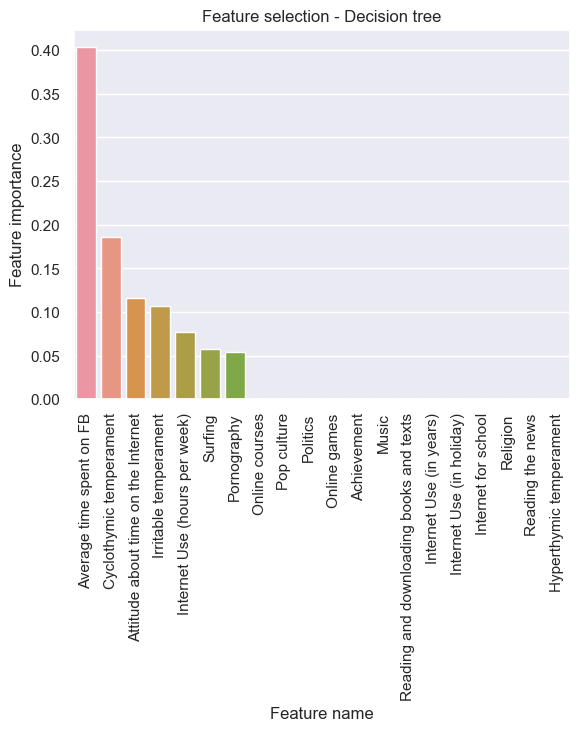

6                    Average time spent on FB
13                    Cyclothymic temperament
5         Attitude about time on the Internet
37                      Irritable temperament
33              Internet Use (hours per week)
55                                    Surfing
43                                Pornography
39                             Online courses
42                                Pop culture
41                                   Politics
40                               Online games
0                                 Achievement
38                                      Music
44    Reading and downloading books and texts
35                    Internet Use (in years)
34                  Internet Use (in holiday)
36                        Internet for school
46                                   Religion
45                           Reading the news
31                    Hyperthymic temperament
Name: attr_names, dtype: object

In [64]:
#feature selection za decision tree
decision_tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
def feature_selection_decision_tree(n_features):
    sns.set()
    decision_tree.fit(X_cols_preprocessed, y_col_preprocessed)
    values = decision_tree.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False).head(n_features)
    sns.barplot(x = tree_features['attr_names'], y=tree_features['values'])
    title = 'Feature selection - Decision tree'
    plt.title(title)
    plt.xlabel('Feature name')
    plt.xticks(rotation=90)
    plt.ylabel('Feature importance')
    plt.show()
    #cuvanje najkorisnijih feature-a
    best_decision_tree_features = tree_features['attr_names']
    return best_decision_tree_features
feature_selection_decision_tree(20)

In [63]:
#prikaz rezultata za sve feature vrednosti, nema negativnih vrednosti
#tabelarni prikaz, iznad se nalazi graficki prikaz 
def feature_score_dtc():
    sns.set()
    decision_tree.fit(X_cols_preprocessed, y_col_preprocessed)
    values = decision_tree.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False)
    return tree_features
print(feature_score_dtc())

                                 attr_names    values
6                  Average time spent on FB  0.101001
13                  Cyclothymic temperament  0.066444
37                    Irritable temperament  0.044180
31                  Hyperthymic temperament  0.033431
35                  Internet Use (in years)  0.032163
48             Search for favorite websites  0.029540
45                         Reading the news  0.027895
3                       Anxiety temperament  0.027703
52                 Sports – days in a  week  0.026237
15                  Drepressive temperament  0.025486
5       Attitude about time on the Internet  0.024479
33            Internet Use (hours per week)  0.024284
34                Internet Use (in holiday)  0.024143
43                              Pornography  0.023672
51                                   Sports  0.022852
11               Communication on the forum  0.022174
42                              Pop culture  0.021731
55                          

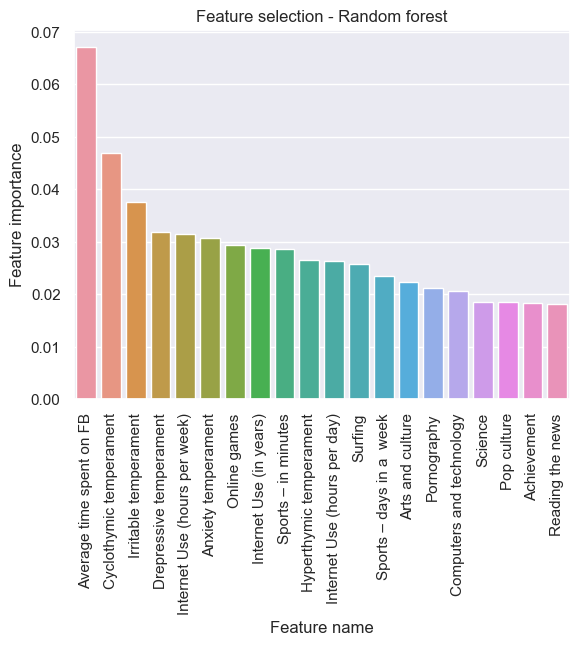

6          Average time spent on FB
13          Cyclothymic temperament
37            Irritable temperament
15          Drepressive temperament
33    Internet Use (hours per week)
3               Anxiety temperament
40                     Online games
35          Internet Use (in years)
53              Sports – in minutes
31          Hyperthymic temperament
32     Internet Use (hours per day)
55                          Surfing
52         Sports – days in a  week
4                  Arts and culture
43                      Pornography
12         Computers and technology
47                          Science
42                      Pop culture
0                       Achievement
45                 Reading the news
Name: attr_names, dtype: object

In [54]:
#feature selection za random forest
#graficki prikaz
random_forest = RandomForestClassifier()
def feature_selection_random_forest(n_features):
    random_forest.fit(X_cols_preprocessed, y_col_preprocessed)
    values = random_forest.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False).head(n_features)
    sns.barplot(x = tree_features['attr_names'], y=tree_features['values'])
    title = 'Feature selection - Random forest'
    plt.title(title)
    plt.xlabel('Feature name')
    plt.xticks(rotation=90)
    plt.ylabel('Feature importance')
    plt.show()
    #cuvanje najkorisnijih feature-a
    best_random_forest_features = tree_features['attr_names']
    return best_random_forest_features
feature_selection_random_forest(20)

In [55]:
#feature score za random forest, nema negativnih vrednosti
#tabelarni prikaz, iznad se nalazi graficki
def feature_score_rfc():
    random_forest.fit(X_cols_preprocessed, y_col_preprocessed)
    values = random_forest.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False)
    return tree_features
    
print(feature_score_rfc())

                                 attr_names    values
6                  Average time spent on FB  0.064789
13                  Cyclothymic temperament  0.048180
37                    Irritable temperament  0.035729
33            Internet Use (hours per week)  0.034284
3                       Anxiety temperament  0.032069
15                  Drepressive temperament  0.029122
53                      Sports – in minutes  0.028644
31                  Hyperthymic temperament  0.028211
40                             Online games  0.027890
55                                  Surfing  0.026852
32             Internet Use (hours per day)  0.026457
35                  Internet Use (in years)  0.024870
4                          Arts and culture  0.023265
52                 Sports – days in a  week  0.021852
43                              Pornography  0.021409
12                 Computers and technology  0.020325
42                              Pop culture  0.019129
45                         R

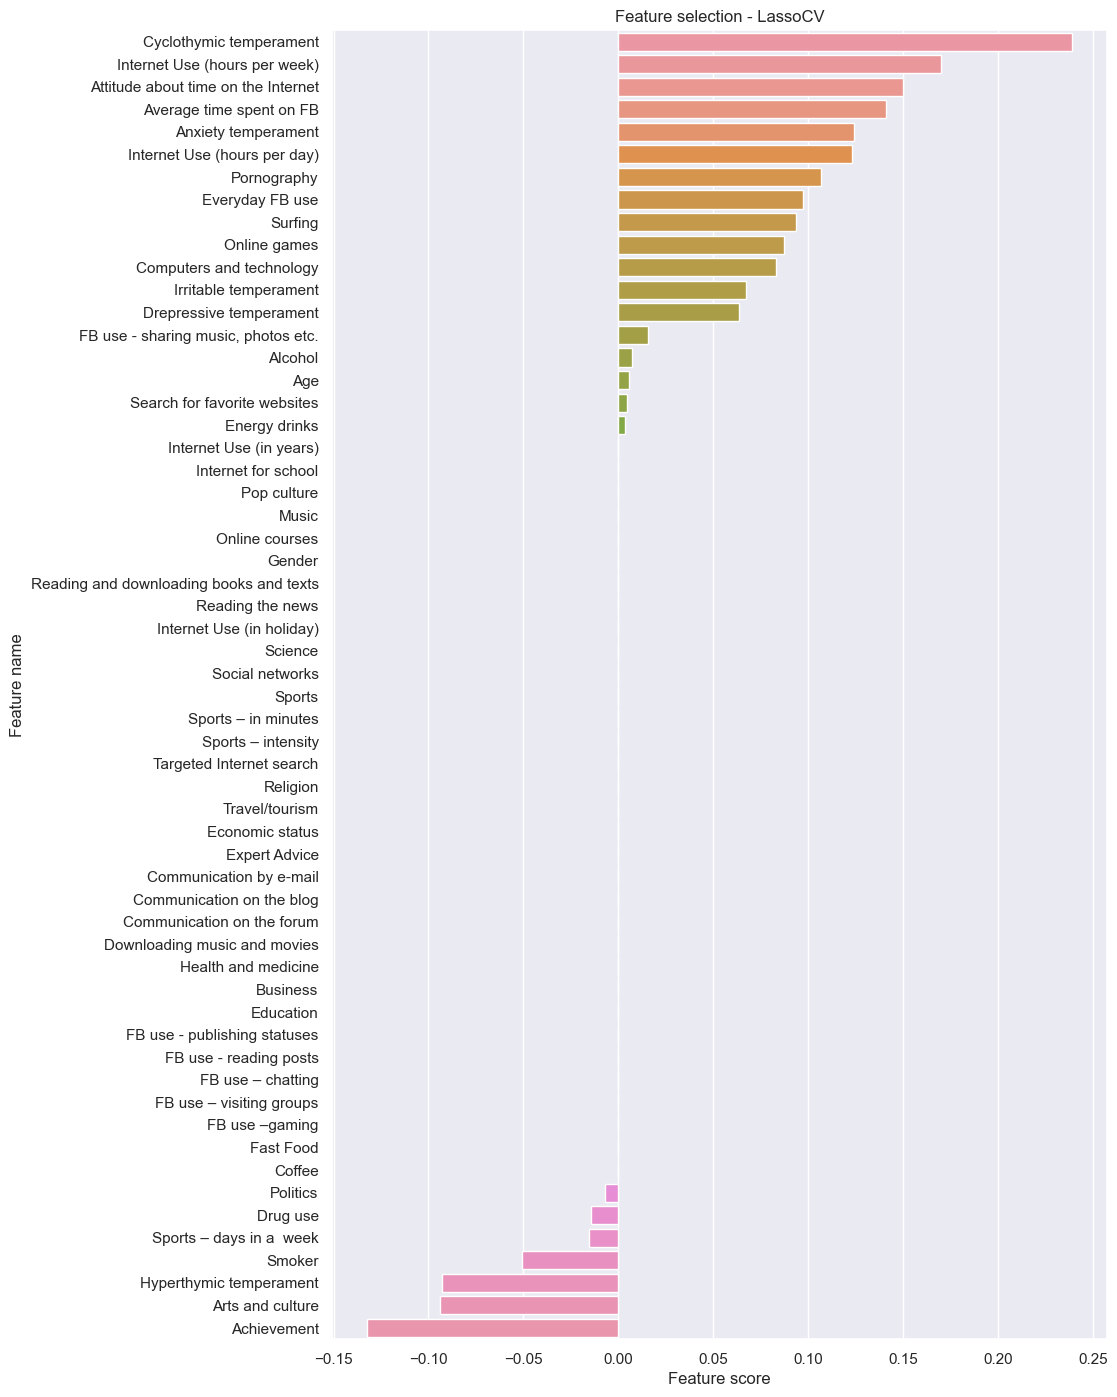

In [56]:
#feature score sa LassoCV modelom 
#u ovom slucaju je moguce dobijanje i pozitivnih i negativnih vrednosti
#graficki prikaz
def feature_score_lasso_cv():
    lasso = LassoCV(cv=3)                                                   
    lasso.fit(X_cols_preprocessed, y_col_preprocessed)      
    lasso_values = lasso.coef_
    attr_names = X_cols_preprocessed.columns.values
    lasso_features = pd.DataFrame({'attr_names':attr_names, 'values':lasso_values})
    lasso_features = lasso_features.sort_values(by='values', ascending=False)  
    plt.figure(figsize=(10,17))
    sns.barplot(y = lasso_features['attr_names'], x=lasso_features['values'])
    title = 'Feature selection - LassoCV'
    plt.title(title)
    plt.xlabel('Feature score')
    plt.ylabel('Feature name')
    plt.show()
feature_score_lasso_cv()

In [57]:
#feature selection sa LassoCV modelom 
#tabelarni prikaz sa apsolutnim vrednostima (uzet znacaj kolone nezavisno od znaka)
def feature_selection_lasso_cv(n_features):
    lasso = LassoCV(cv=3)                                                   
    lasso.fit(X_cols_preprocessed, y_col_preprocessed)      
    lasso_values = lasso.coef_
    attr_names = X_cols_preprocessed.columns.values
    #lasso_features = pd.DataFrame({'attr_names':attr_names, 'values': lasso_values})
    lasso_features_abs = pd.DataFrame({'attr_names':attr_names, 'values': abs(lasso_values)})
    lasso_features_abs = lasso_features_abs.sort_values(by='values', ascending=False).head(n_features)       
    #cuvanje najkorisnijih feature-a
    best_lasso_features_abs = lasso_features_abs['attr_names']
    return best_lasso_features_abs
feature_selection_lasso_cv(20)

13                Cyclothymic temperament
33          Internet Use (hours per week)
5     Attitude about time on the Internet
6                Average time spent on FB
0                             Achievement
3                     Anxiety temperament
32           Internet Use (hours per day)
43                            Pornography
20                        Everyday FB use
4                        Arts and culture
55                                Surfing
31                Hyperthymic temperament
40                           Online games
12               Computers and technology
37                  Irritable temperament
15                Drepressive temperament
49                                 Smoker
24    FB use - sharing music, photos etc.
52               Sports – days in a  week
16                               Drug use
Name: attr_names, dtype: object

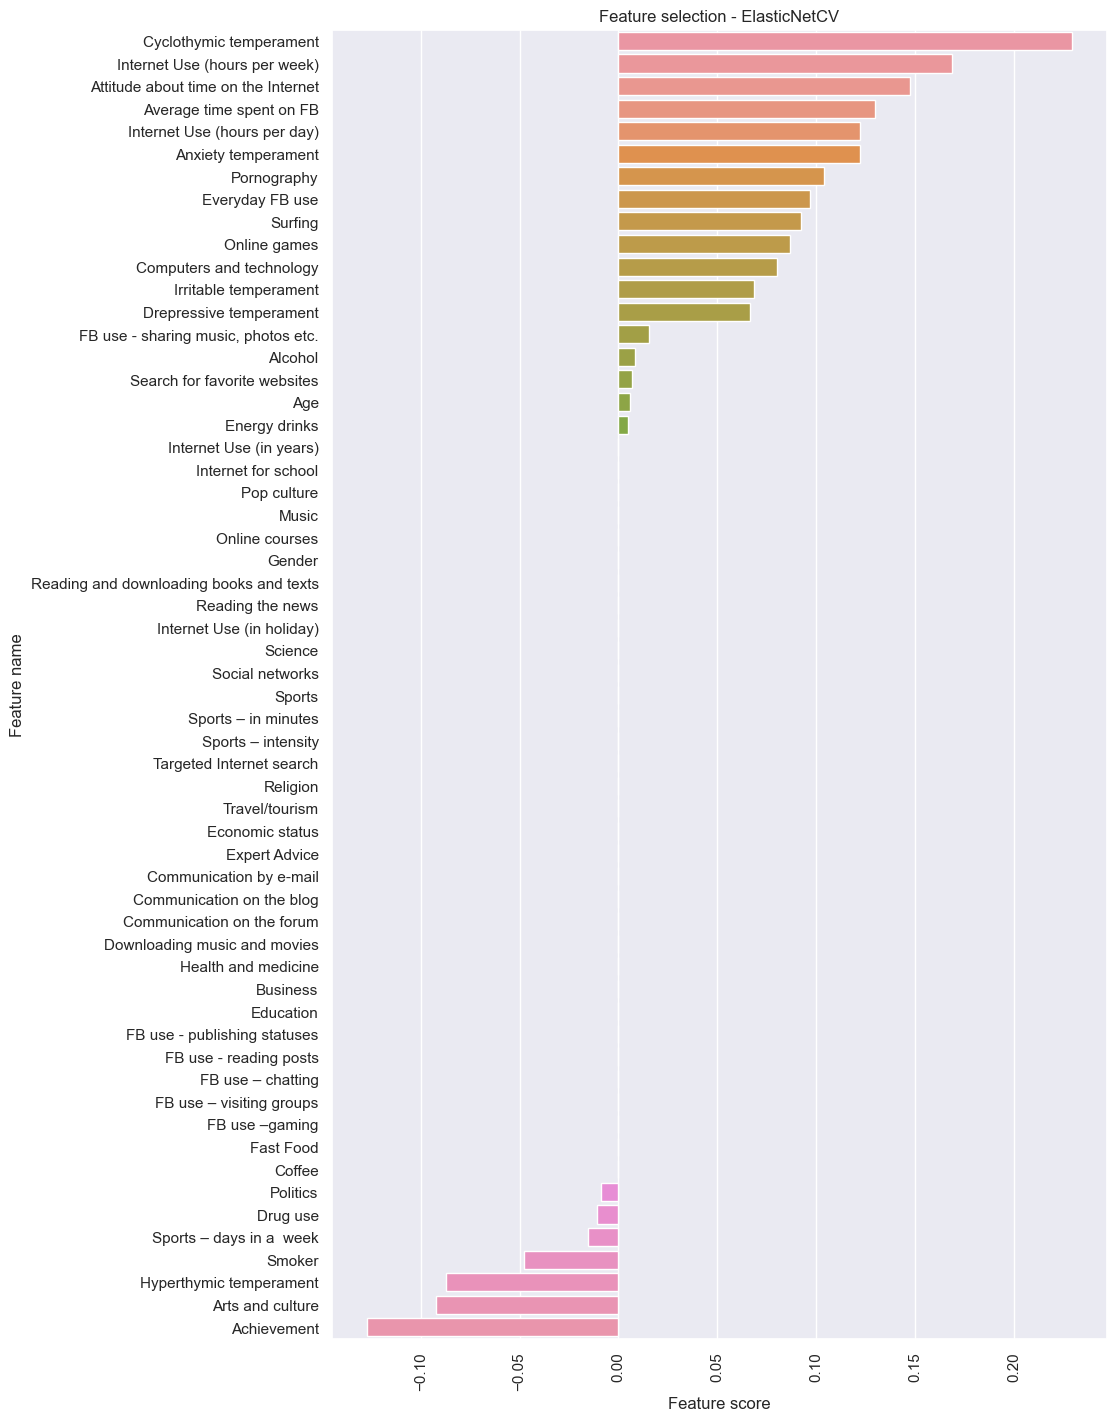

In [58]:
#feature selection koriscenjem ElasticNetCV modela
def feature_score_elasticnet_cv():
    el_net = ElasticNetCV(cv=3)
    el_net.fit(X_cols_preprocessed, y_col_preprocessed)
    el_net_values = el_net.coef_
    attr_names = X_cols_preprocessed.columns.values
    el_net_features = pd.DataFrame({'attr_names':attr_names, 'values':el_net_values})
    el_net_features = el_net_features.sort_values(by='values', ascending=False)  
    plt.figure(figsize=(10,17))
    sns.barplot(y = el_net_features['attr_names'], x =el_net_features['values'])
    title = 'Feature selection - ElasticNetCV'
    plt.title(title)
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Feature name')
    plt.show()
feature_score_elasticnet_cv()

In [59]:
#feature selection koriscenjem ElasticNetCV modela
#tabelarni prikaz sa apsolutnim vrednostima (uzet znacaj kolone nezavisno od znaka)
def feature_selection_elasticnet_cv(n_features):
    el_net = ElasticNetCV(cv=3)
    el_net.fit(X_cols_preprocessed, y_col_preprocessed)
    el_net_values = el_net.coef_
    attr_names = X_cols_preprocessed.columns.values
    el_net_features = pd.DataFrame({'attr_names':attr_names, 'values': abs(el_net_values)})
    el_net_features = el_net_features.sort_values(by='values', ascending=False).head(n_features)       
    #cuvanje najkorisnijih feature-a
    best_el_net_features = el_net_features['attr_names']
    return best_el_net_features
print(feature_selection_elasticnet_cv(20))

13                Cyclothymic temperament
33          Internet Use (hours per week)
5     Attitude about time on the Internet
6                Average time spent on FB
0                             Achievement
32           Internet Use (hours per day)
3                     Anxiety temperament
43                            Pornography
20                        Everyday FB use
55                                Surfing
4                        Arts and culture
31                Hyperthymic temperament
40                           Online games
12               Computers and technology
37                  Irritable temperament
15                Drepressive temperament
49                                 Smoker
24    FB use - sharing music, photos etc.
52               Sports – days in a  week
16                               Drug use
Name: attr_names, dtype: object


In [49]:
#prikaz globalne interpretabilnosti uz Permutation Importance iz eli5 biblioteke
grad_boost = GradientBoostingClassifier().fit(X_train_p, y_train_p)
permutation = PermutationImportance(grad_boost, scoring = 'accuracy')
permutation_model = permutation.fit(X_train_p, y_train_p)
eli5.show_weights(permutation_model, feature_names = list(input_cols.columns))

Weight,Feature
0.0265 ± 0.0116,Average time spent on FB
0.0231 ± 0.0053,Hyperthymic temperament
0.0224 ± 0.0111,Cyclothymic temperament
0.0214 ± 0.0071,Internet Use (hours per week)
0.0147 ± 0.0044,Reading and downloading books and texts
0.0106 ± 0.0043,Internet Use (in years)
0.0098 ± 0.0037,Surfing
0.0090 ± 0.0062,Pornography
0.0080 ± 0.0089,Arts and culture
0.0076 ± 0.0061,Achievement


In [55]:
#genetski algoritmi
parameters = {'n_estimators':[10,50,100], 
              'criterion': ['gini', 'entropy'],
              'max_features': list(range(3,8)),
              'max_depth': [2,4,9]
               }
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 11),
              'max_leaf_nodes': Integer(2, 15),
              'n_estimators': Integer(100,300)}

clf = RandomForestClassifier()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                              cv=cv,
                              scoring='accuracy',
                              n_jobs=-1,
                              param_grid = param_grid,
                              verbose=True)

evolved_estimator.fit(X_train_p, y_train_p)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.661809	0.0330792  	0.728709   	0.627785   
1  	100   	0.687066	0.0313602  	0.728714   	0.627785   
2  	100   	0.707931	0.0135592  	0.728714   	0.674306   
3  	100   	0.714066	0.011566   	0.728714   	0.680218   
4  	100   	0.721156	0.00676973 	0.730025   	0.698556   
5  	100   	0.72586 	0.00374713 	0.731333   	0.717564   
6  	100   	0.725507	0.00610029 	0.735263   	0.694623   
7  	100   	0.727222	0.00376116 	0.735263   	0.717569   
8  	100   	0.726149	0.0034768  	0.735263   	0.718884   
9  	100   	0.726503	0.00466239 	0.735263   	0.710349   
10 	100   	0.72708 	0.00340702 	0.731326   	0.716256   
11 	100   	0.726855	0.00401954 	0.731319   	0.716905   
12 	100   	0.726199	0.00439821 	0.731981   	0.716914   
13 	100   	0.726434	0.00369023 	0.731981   	0.720185   
14 	100   	0.726265	0.00470781 	0.732641   	0.711006   
15 	100   	0.726778	0.00333464 	0.732641   	0.719542   
16 	100   	0.726752	0.00393451 	0.732641   	0.71

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(bootstrap=False, max_depth=11,
                                            max_leaf_nodes=15,
                                            min_weight_fraction_leaf=0.017932107379404545,
                                            n_estimators=172),
           n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x000001E5566A90F0>,
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x000001E5566A8430>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x000001E5566A8550>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x000001E5566A8370>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x000001E5566A9210>},
           return_train_score=True, scoring='accuracy')

In [60]:
#rezultati koriscenjem genetskih algoritama
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

0.6849087893864013


In [61]:
#feature selection koriscenjem genetskih algoritama
clf = RandomForestClassifier()
evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.704037	0.0169929  	0.730459   	0.651488   
1  	60    	0.716033	0.0110182  	0.737571   	0.694183   
2  	60    	0.720869	0.00989338 	0.733287   	0.699148   
3  	60    	0.724804	0.00772097 	0.733287   	0.700562   
4  	60    	0.725542	0.00916437 	0.736842   	0.70201    
5  	60    	0.726369	0.0120166  	0.736847   	0.694168   
6  	60    	0.724472	0.0134134  	0.736847   	0.694168   
7  	60    	0.721769	0.0146793  	0.743237   	0.688481   
8  	60    	0.725751	0.0129521  	0.743237   	0.695586   
9  	60    	0.72165 	0.0146729  	0.743237   	0.689898   
10 	60    	0.732225	0.0086688  	0.743237   	0.711961   
11 	60    	0.730564	0.0113806  	0.743237   	0.689193   
12 	60    	0.727603	0.0140621  	0.743237   	0.68779    
13 	60    	0.729995	0.0139751  	0.743253   	0.685629   
14 	60    	0.731159	0.012084   	0.74468    	0.697716   
15 	60    	0.732961	0.0167787  	0.74468    	0.669282   
16 	60    	0.73064 	0.0151267  	0.74468    	0.68

GAFeatureSelectionCV(estimator=RandomForestClassifier(), generations=20,
                     keep_top_k=2, n_jobs=-1, population_size=30,
                     scoring='accuracy')

In [62]:
#feature selection koriscenjem genetskih alogiritama 
gen_opt_features = evolved_estimator.best_features_
gen_df = pd.DataFrame({'feature': X_train_p.columns, 'is_used':gen_opt_features})

def highlight_cells(val):
    color = 'yellow' if val == True else ''
    return 'background-color: {}'.format(color)

selected_features = gen_df[gen_df['is_used'] == True]['feature']
gen_df.style.applymap(highlight_cells)

,feature,is_used
0,Achievement,True
1,Age,True
2,Alcohol,False
3,Anxiety temperament,True
4,Arts and culture,True
5,Attitude about time on the Internet,False
6,Average time spent on FB,True
7,Business,False
8,Coffee,True
9,Communication by e-mail,False


In [48]:
#neuronske mreze za klasifikaciju
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter= 90,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)
trained_model = mlp.fit(X_train_p, y_train_p)
y_preds = trained_model.predict(X_test_p)
plt.show()
print('Accuracy for MLP-om: {:.2f}'.format(trained_model.score(X_test_p, y_test_p)))
print('Classification report for MLP: ')
print(classification_report(y_test_p, y_preds))

Iteration 1, loss = 0.68113058
Iteration 2, loss = 0.58493877
Iteration 3, loss = 0.56495935
Iteration 4, loss = 0.51586058
Iteration 5, loss = 0.53638045
Iteration 6, loss = 0.50987343
Iteration 7, loss = 0.50278247
Iteration 8, loss = 0.50199879
Iteration 9, loss = 0.49678759
Iteration 10, loss = 0.49180402
Iteration 11, loss = 0.48264769
Iteration 12, loss = 0.48576923
Iteration 13, loss = 0.49037142
Iteration 14, loss = 0.48089596
Iteration 15, loss = 0.47844066
Iteration 16, loss = 0.45868965
Iteration 17, loss = 0.45520101
Iteration 18, loss = 0.45702781
Iteration 19, loss = 0.44461915
Iteration 20, loss = 0.44163417
Iteration 21, loss = 0.41926917
Iteration 22, loss = 0.42171672
Iteration 23, loss = 0.41265873
Iteration 24, loss = 0.46624211
Iteration 25, loss = 0.44839791
Iteration 26, loss = 0.45754978
Iteration 27, loss = 0.42934107
Iteration 28, loss = 0.40484610
Iteration 29, loss = 0.41942622
Iteration 30, loss = 0.39279323
Iteration 31, loss = 0.37643497
Iteration 32, los

In [39]:
#auto-sklearn za klasifikaciju, moguce pokrenuti samo na Linux sistemu
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", accuracy_score(y_test, y_hat))
print(automl.leaderboard())

Accuracy score 0.746268656716418
          rank  ensemble_weight           type      cost  duration
model_id                                                          
5            1             0.14  random_forest  0.242938  2.457265
18           2             0.04  random_forest  0.244821  2.536645
2            3             0.20  random_forest  0.246704  2.158461
6            4             0.08  random_forest  0.246704  2.341989
15           5             0.08  random_forest  0.256121  2.601341
11           6             0.16  random_forest  0.258004  3.490302
16           7             0.30    extra_trees  0.265537  6.225641
